<a href="https://colab.research.google.com/github/njlym/Data-Science-and-Machine-learning-Bootcamp/blob/main/Loan_Default_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part I


**Loan Default Prediction**





```
Dataset called Loan Default Prediction.

The source: ( https://www.kaggle.com/datasets/kmldas/loan-default-prediction/data).


DataSet Description

* Employed: 1 for employed and 0 for unemployed;

* Bank Balance: The amount of money that client had available in their account at the moment the data was obtained;

* Annual Salary: The annual salary of each client;

* Defaulted?: This is our target variable and it's filled of 0 for each client who didn't default and 1 for each client who defaulted their loans.


```

## 1- Data Cleaning

In [ ]:
#Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics , svm , datasets
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
url ='https://filebin.net/9ldgx3m9vv593xqe/Default_Fin.csv'

#Read data from CSV file
data = pd.read_csv(url)
data


,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0
...,...,...,...,...,...
9995,9996,1,8538.72,635908.56,0
9996,9997,1,9095.52,235928.64,0
9997,9998,1,10144.92,703633.92,0
9998,9999,1,18828.12,440029.32,0


In [ ]:
#Explore the data
data.head(10)

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0
5,6,0,11035.08,89898.72,0
6,7,1,9906.12,298862.76,0
7,8,0,9704.04,211205.40,0
8,9,1,13932.72,449622.36,0
9,10,1,0.00,351303.24,0


In [ ]:
#The column
data.columns

Index(['Index', 'Employed', 'Bank Balance', 'Annual Salary', 'Defaulted?'], dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          10000 non-null  int64  
 1   Employed       10000 non-null  int64  
 2   Bank Balance   10000 non-null  float64
 3   Annual Salary  10000 non-null  float64
 4   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB


In [ ]:
#Check the null (missing values)
data.isnull().sum()

Index            0
Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

```
since the output is all zero, that means there are no missing values in this dataframe .
```

In [ ]:
#Check for duplicate rows
data.duplicated().sum()

0

```
since the output is zero, that means there are no duplicate rows in this dataframe .

```

In [ ]:
# Five-number summary for numerical columns
five_num_summary = data.describe().transpose()
print(five_num_summary)

                 count           mean            std      min        25%  \
Index          10000.0    5000.500000    2886.895680     1.00    2500.75   
Employed       10000.0       0.705600       0.455795     0.00       0.00   
Bank Balance   10000.0   10024.498524    5804.579486     0.00    5780.79   
Annual Salary  10000.0  402203.782224  160039.674988  9263.64  256085.52   
Defaulted?     10000.0       0.033300       0.179428     0.00       0.00   

                     50%        75%        max  
Index            5000.50    7500.25   10000.00  
Employed            1.00       1.00       1.00  
Bank Balance     9883.62   13995.66   31851.84  
Annual Salary  414631.74  525692.76  882650.76  
Defaulted?          0.00       0.00       1.00  


```
There is no outliers .

```

In [ ]:
# Check for inconsistencies
print(data.value_counts())

Index  Employed  Bank Balance  Annual Salary  Defaulted?
1      1         8754.36       532339.56      0             1
6671   1         2100.60       271740.00      0             1
6664   0         5174.40       243617.88      0             1
6665   1         16938.60      515479.56      0             1
6666   0         14201.40      194271.48      0             1
                                                           ..
3334   1         13891.80      468963.12      0             1
3335   1         10793.52      436022.64      0             1
3336   1         3974.04       537026.76      0             1
3337   1         5270.40       505584.12      0             1
10000  0         2411.04       202355.40      0             1
Length: 10000, dtype: int64


```
There is no inconsistencies

```

## 2- Data Visualization

### Correlation Matrix

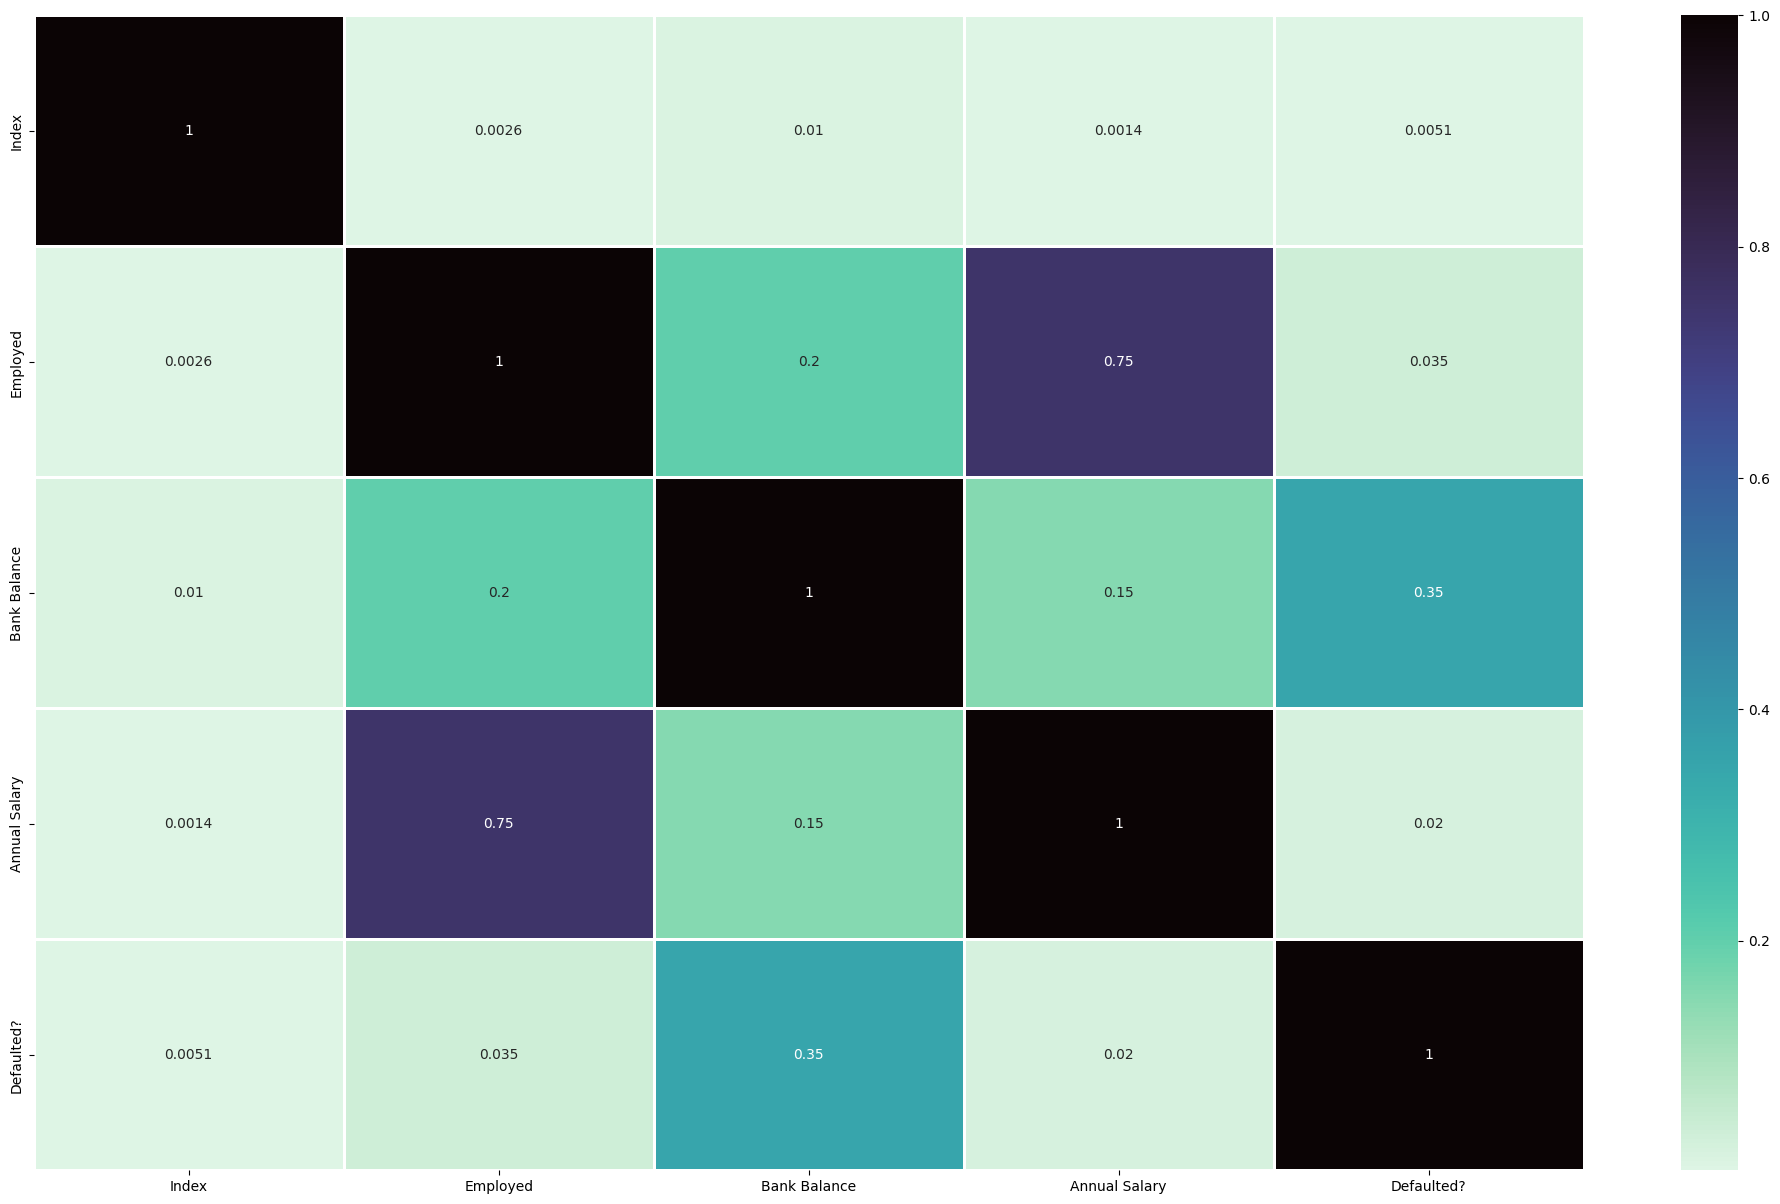

In [ ]:
# -1 to +1
# Heatmap using Seaborn

corr=data.corr().abs()
plt.figure(figsize = (25,15))

ax = sns.heatmap(corr, annot=True, linewidths=1,cmap='mako_r')

### Pie chart

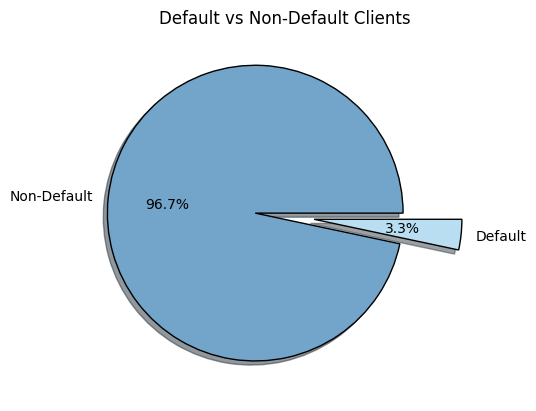

In [ ]:
# Createing a Pie chart to compare between defualte and non-defualte
df= data['Defaulted?'].value_counts()
wp = {'linewidth':1, 'edgecolor':"black"}
explode = (0.2,0.2)
colors = ["#73A4CA", "#B9DDF1"]
plt.pie(df, labels=['Non-Default', 'Default'], autopct='%1.1f%%',wedgeprops = wp, explode = explode, shadow=True ,colors=colors)
plt.title('Default vs Non-Default Clients')
plt.show()

In [ ]:
employed = data.query("Employed == 1")
unemployed = data.query("Employed == 0")

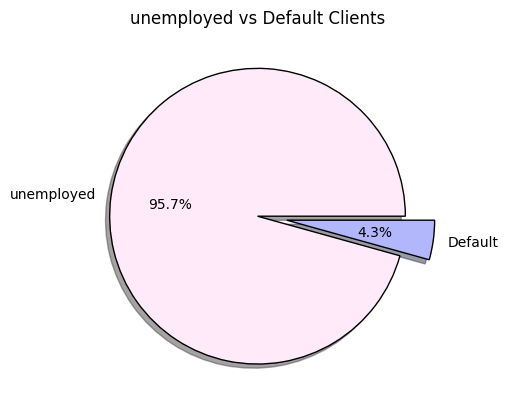

In [ ]:
#Distribution Clients Who Are Unemployed and Defaulted
df = unemployed['Defaulted?'].value_counts()
wp = {'linewidth':1, 'edgecolor':"black"}
explode = (0,0.2)
colors = ["#feeaf8", "#b2b6fb"]
plt.pie(df, labels=['unemployed', 'Default'], autopct='%1.1f%%',wedgeprops = wp, explode = explode, shadow=True ,colors=colors)
plt.title('unemployed vs Default Clients')
plt.show()

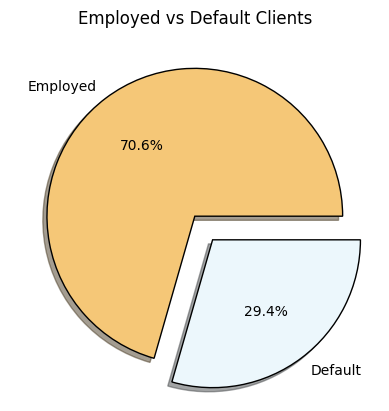

In [ ]:
#Distribution of Clients Who Are Employed and Defaulted
df = data['Employed'].value_counts()
wp = {'linewidth':1, 'edgecolor':"black"}
explode = (0,0.2)
colors = ["#f5c777", "#ecf7fc"]
plt.pie(df, labels= ['Employed', 'Default'], autopct='%1.1f%%',wedgeprops = wp, explode = explode, shadow=True ,colors=colors)
plt.title('Employed vs Default Clients')
plt.show()

### Bar chart

(array([ 3.,  0.,  6., 13., 12., 27., 49., 33., 55., 51., 40., 26., 11.,
         5.,  2.]),
 array([ 7828.8  ,  9430.336, 11031.872, 12633.408, 14234.944, 15836.48 ,
        17438.016, 19039.552, 20641.088, 22242.624, 23844.16 , 25445.696,
        27047.232, 28648.768, 30250.304, 31851.84 ]),
 <BarContainer object of 15 artists>)

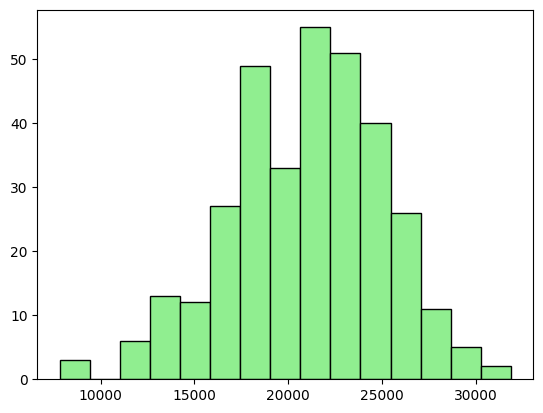

In [ ]:
df= data.copy()
Default_plt=df[data['Defaulted?']==1]['Bank Balance']
plt.hist(Default_plt, color='lightgreen', ec='black', bins=15)

### Line chart

<ipython-input-25-c8c3df1ef3f5>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bankbalnce, bins=10, hist_kws=dict(color='g'))


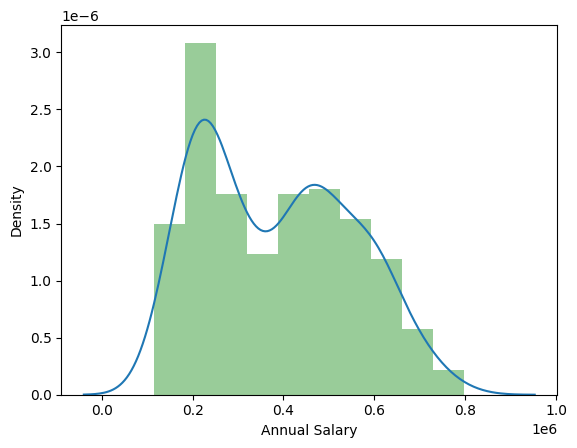

In [ ]:
bankbalnce=df[data['Defaulted?']==1]['Annual Salary']
sns.distplot(bankbalnce, bins=10, hist_kws=dict(color='g'))
plt.show()

## 3- ML Model

### **Problem Statement:** Given above data build a machine learning model that can predict if a person will be defualted in a loan
>



In [ ]:
df=data.copy()

In [ ]:
result={}

In [ ]:

X = df.drop('Defaulted?', axis=1)
y = df['Defaulted?'] #target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Decision Tree Classifier

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train) #training
tree_clf_pred = tree_clf.predict(X_test) #test

In [ ]:
# Evaluate the DT
tree_clf_accuracy = metrics.accuracy_score(y_test, tree_clf_pred)

# Store the results of Decision Tree Classifier model in the dictionary
result["DT"] = {"accuracy": tree_clf_accuracy}

In [ ]:
result

{'DT': {'accuracy': 0.953}}

#### Random Forest classifar

In [ ]:
RT=RandomForestClassifier()

In [ ]:
#Prediction model
RT.fit(X_train, y_train)
RT_prediction=RT.predict(X_test)

In [ ]:
# accuracy
RT_accuracy= metrics.accuracy_score(y_test,RT_prediction)
#to store the results from this classifier also
result["RT"]={"accuracy": RT_accuracy}
result

{'DT': {'accuracy': 0.953}, 'RT': {'accuracy': 0.972}}

#### Logstic Regression

In [ ]:
LR=LogisticRegression()

In [ ]:
#Prediction model
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)

In [ ]:
# accuracy
acc = metrics.accuracy_score(y_test, y_pred)
result["LR"] = {"accuracy": acc}


In [ ]:
result

{'DT': {'accuracy': 0.953},
 'RT': {'accuracy': 0.972},
 'LR': {'accuracy': 0.965}}

#### SVM

In [ ]:

# Create SVM model
svm_model = SVC(kernel='linear',random_state=42)  # Linear kernel

# Train the model
svm_model.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = svm_model.predict(X_test)



In [ ]:
# accuracy
# Calculate  accuracy
accuracySVM = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracySVM)


Accuracy: 0.9706666666666667


In [ ]:
result["SVM"] = {"accuracy": accuracySVM}
result

{'DT': {'accuracy': 0.953},
 'RT': {'accuracy': 0.972},
 'LR': {'accuracy': 0.965},
 'SVM': {'accuracy': 0.9706666666666667}}

#### KNeighborsClassifier

In [ ]:
# Training the model
knn = KNeighborsClassifier(n_neighbors=4)  # You can adjust the number of neighbors as needed

knn.fit(X_train, y_train)

# Making predictions
y_pred = knn.predict(X_test)

# Evaluating the model
accuracy =metrics. accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9683333333333334


In [ ]:
result["KNeigbhors"] = {"accuracy": accuracy}
result

{'DT': {'accuracy': 0.953},
 'RT': {'accuracy': 0.972},
 'LR': {'accuracy': 0.965},
 'SVM': {'accuracy': 0.9706666666666667},
 'KNeigbhors': {'accuracy': 0.9683333333333334}}

## Final Result

In [ ]:

# Create a dictionary of results
Finalresult = {
    "Model": ["Decision Tree", "Random Forest", "Logistic Regression", "SVM", "KNeighborsClassifier"],
    "Accuracy": [tree_clf_accuracy, RT_accuracy, acc, accuracySVM, accuracy]
}

# Convert the dictionary to a DataFrame
df = pd.DataFrame(Finalresult)

# Print the DataFrame
print(df)


                  Model  Accuracy
0         Decision Tree  0.953000
1         Random Forest  0.972000
2   Logistic Regression  0.965000
3                   SVM  0.970667
4  KNeighborsClassifier  0.968333


**The best model was Random Forest with accuracy of 0.971**





# Part II

## solve Q1

1. Loop:
Question:
Write a Python program that uses a 'for' loop to print all even numbers from 1 to 10. Then, use 'while' loop.

In [ ]:
# create function even_num that take 2 parameter from user
# parameter#1 => first number parameter#2 => last number (Range of number)

def even_num(f_num,l_num):

  # Using for loop
  print("Using 'for' loop:")
  for i in range(f_num, l_num + 1):
    if i % 2 == 0 :
      print("The even numbers are: ", i)

  # Using while loop
  num = f_num
  print("\nUsing 'while' loop:")
  while num <= l_num:
      if num % 2 == 0:
          print("The even numbers are: ",num)
      num += 1

f_n = int(input("Please enter your first number:(start in range)"))
l_n = int(input("Please enter your last number:(last in range)"))

even_num(f_n, l_n)

Please enter your first number:(start in range)2
Please enter your last number:(last in range)10
Using 'for' loop:
The even numbers are:  2
The even numbers are:  4
The even numbers are:  6
The even numbers are:  8
The even numbers are:  10

Using 'while' loop:
The even numbers are:  2
The even numbers are:  4
The even numbers are:  6
The even numbers are:  8
The even numbers are:  10




```

```

## solve Q2

2. Control Flows:
Question:
Create a Python function named grade_classifier that takes a student's score as an argument and returns a string indicating their grade. Use the following criteria:

Score >= 90: "A"
80 <= Score < 90: "B"
70 <= Score < 80: "C"
60 <= Score < 70: "D"
Score < 60: "F"

In [ ]:
# Create function grade_classifier
def grade_classifier(score):
    if score >= 90:
        return "A"
    elif score >= 80:
        return "B"
    elif score >= 70:
        return "C"
    elif score >= 60:
        return "D"
    else:
        return "F"

# Test the function
score = 85
print(f"A student with a score of {score} gets a grade of {grade_classifier(score)}")






A student with a score of 85 gets a grade of B


## solve Q3

3. If Conditions:
Question:
Write a Python program that prompts the user to enter their age. Use if-elif-else statements to categorize and print the user's age group as follows:

If the age is less than 13, print "Child."
If the age is between 13 and 19 (inclusive), print "Teenager."
If the age is between 20 and 59 (inclusive), print "Adult."
If the age is 60 or older, print "Senior Citizen."

In [ ]:
# Create function
def categorize_age(age):
    if age < 0:
        print("Age can not be negative.")
    else:
        if age < 13:
            print(f"Based on your age ({age} years), you fall into the age group of Child")
        elif age >= 13 and age <= 19:
            print(f"Based on your age ({age} years), you fall into the age group of Teenager")
        elif age >= 20 and age <= 59:
            print(f"Based on your age ({age} years), you fall into the age group of Adult")
        else:
            print(f"Based on your age ({age} years), you fall into the age group of Senior Citizen")
# using f-string in the print statements because it provides a concise and readable way to interpolate variables and expressions directly into string literals.
# Prompt the user to enter their age
age = int(input("Enter your age: "))
categorize_age(age)


Enter your age: 22
Based on your age (22 years), you fall into the age group of Adult


## solve Q4  

4. Functions:
Question:
Define a Python function named multiply_numbers that takes two parameters (num1 and num2) and returns their product. Test the function with values 5 and 7.
5 * 7 = 35

In [ ]:
# Create function multiply_numbers

def multiply_numbers(num1, num2):
    return num1 * num2

result = multiply_numbers(5, 7)

print("5 * 7 =", result)
# Test the function with values 5 and 7


5 * 7 = 35


## solve Q5

5. Combine All the Above:
Question:
Write a Python program that does the following:

Prompts the user to enter a number (user_num).
Uses a loop to print all numbers from 1 to user_num (inclusive) that are divisible by 3.
Calls the grade_classifier function to classify a user's score (you can use a predefined score for testing).
Prints a message indicating whether the classified grade is satisfactory or not.

In [ ]:
# Prompt the user to enter their number
user_num = int(input("Enter a number: "))

# Use a loop to print numbers divisible by 3 from 1 to user_num
print(f"Numbers divisible by 3 from 1 to {user_num}:")
for num in range(1, user_num + 1):
    if num % 3 == 0:
        print(num)

# Call the grade_classifier function in Q2
test_score = int(input("Enter student score: "))
classified_grade = grade_classifier(test_score)

# Print a message indicating whether the classified grade is satisfactory or not
if classified_grade in ['A', 'B', 'C']:
    print(f"The classified grade ({classified_grade}) is satisfactory.")
else:
    print(f"The classified grade ({classified_grade}) is not satisfactory.")


Enter a number: 30
Numbers divisible by 3 from 1 to 30:
3
6
9
12
15
18
21
24
27
30
Enter student score: 97
The classified grade (A) is satisfactory.
